<h1 style="text-align: center;">MIS 542 &ndash; Advanced Business Analytics</h1>
<h1 style="text-align: center;">First Business Case - Segmenting Consumer of Bath Soap</h1>

### Team 7 Members - Section 1:
### Nada Alomari - 202111090 | Saja Alqahtani - 202111070 | Reda Alhamza - 201365390

### Packages

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

### Importing Dataset

In [2]:
bathsoap_df = pd.read_csv('D:/BathSoap.csv')
bathsoap_df.set_index('Member id', inplace=True) 

In [3]:
# using scikit-learn, only normalizing predictors without Class
bathsoap_df_norm = bathsoap_df.iloc[:, :45].apply(preprocessing.scale, axis=0)

In [4]:
bathsoap_df_norm = bathsoap_df_norm.apply(lambda x: x.astype('float64'))

In [5]:
bathsoap_df_norm = pd.concat([bathsoap_df_norm, bathsoap_df['Class']], axis= 1) # Adding back the Class variable

In [6]:
bathsoap_df_norm = bathsoap_df_norm.dropna(how='any') # to drop Nan values

In [7]:
bathsoap_df_norm['Class'].replace({'Success':1, 'Fail':0}, inplace=True) # This step is for Q3

## Q1. Use k-means clustering to run 2 and 3 clusters of households based on:
### a. The variables that describe purchase behavior including brand loyalty. (K = 2)

In [8]:
bathsoap_df_norm['max_BrIndicator'] = bathsoap_df_norm['Br. Cd. 57, 144'].max() # for Max Bran Indicator.

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']])
# Cluster membership
memb = pd.Series(kmeans.labels_, index=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']].index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join([str(i) for i in item.index]))

0 :  1010020.0, 1014020.0, 1017020.0, 1017360.0, 1017490.0, 1020070.0, 1024120.0, 1024220.0, 1025070.0, 1027390.0, 1028050.0, 1035150.0, 1037220.0, 1037420.0, 1037630.0, 1037850.0, 1037890.0, 1038080.0, 1040080.0, 1040150.0, 1040370.0, 1045120.0, 1047350.0, 1047610.0, 1047750.0, 1047760.0, 1047870.0, 1050210.0, 1054110.0, 1054310.0, 1055060.0, 1055160.0, 1055330.0, 1057550.0, 1057800.0, 1057930.0, 1058010.0, 1058190.0, 1060130.0, 1060150.0, 1060230.0, 1060260.0, 1060370.0, 1060420.0, 1060590.0, 1060640.0, 1060720.0, 1060760.0, 1060920.0, 1061130.0, 1061180.0, 1061310.0, 1061400.0, 1061580.0, 1061700.0, 1061730.0, 1062270.0, 1065080.0, 1065100.0, 1065600.0, 1065650.0, 1065660.0, 1070040.0, 1070270.0, 1070300.0, 1070330.0, 1070420.0, 1070600.0, 1070670.0, 1070790.0, 1071010.0, 1071090.0, 1071780.0, 1071800.0, 1071840.0, 1075060.0, 1075130.0, 1075220.0, 1075350.0, 1075610.0, 1075630.0, 1075690.0, 1075730.0, 1080220.0, 1080330.0, 1080390.0, 1080590.0, 1080750.0, 1080950.0, 1081260.0, 10815

Cluster centroids and squared distances for k-means
with k = 2

In [10]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']].columns)
pd.set_option('precision', 3)
print(centroids)

   Avg. Price   No. of Brands  No. of  Trans  Brand Runs  Total Volume  Value  \
0        0.268          0.678          0.697       0.785         0.339  0.502   
1       -0.212         -0.536         -0.551      -0.621        -0.268 -0.397   

   Trans / Brand Runs  Others 999  Vol/Tran  max_BrIndicator  \
0              -0.267       0.280    -0.227            3.455   
1               0.211      -0.222     0.179            3.455   

   Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  
0                -0.356              0.419                  0.049  
1                 0.281             -0.332                 -0.039  


Within-cluster sum of squared distances and cluster count

In [11]:
withinClusterSS = [0] * 2
clusterCount = [0] * 2
for cluster, distance in zip(kmeans.labels_, kmeans.transform(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']])):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (265 members): 2814.43 within cluster
Cluster 1 (335 members): 3199.03 within cluster


,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,cluster
0,0.268,0.678,0.697,0.785,0.339,0.502,-0.267,0.280,-0.227,3.455,-0.356,0.419,0.049,Cluster 0
1,-0.212,-0.536,-0.551,-0.621,-0.268,-0.397,0.211,-0.222,0.179,3.455,0.281,-0.332,-0.039,Cluster 1


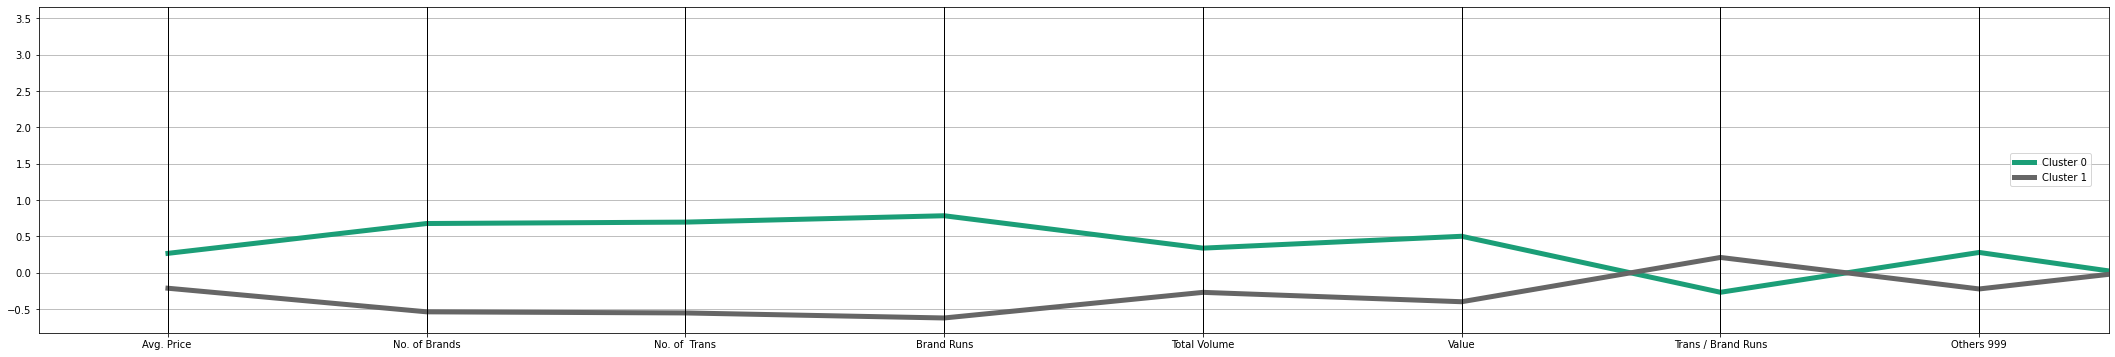

In [12]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [13]:
bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']].groupby(kmeans.labels_).mean()

,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %
0,0.268,0.678,0.697,0.785,0.339,0.502,-0.267,0.280,-0.227,3.455,-0.356,0.419,0.049
1,-0.212,-0.536,-0.551,-0.621,-0.268,-0.397,0.211,-0.222,0.179,3.455,0.281,-0.332,-0.039


In [14]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

       0      1
0  0.000  2.835
1  2.835  0.000


In [15]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    2.835
1    2.835
dtype: float64

C:\Users\rs7am\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


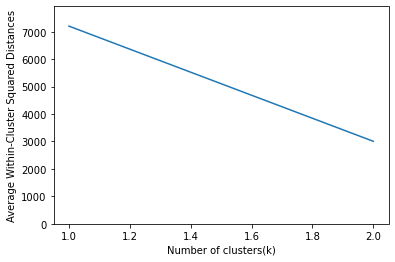

In [16]:
inertia = []
for n_clusters in range(1, 3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']])
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 3), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### a. The variables that describe purchase behavior including brand loyalty. (K = 3)

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']])
# Cluster membership
memb = pd.Series(kmeans.labels_, index=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']].index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join([str(i) for i in item.index]))

0 :  1010010.0, 1014030.0, 1017110.0, 1017160.0, 1017460.0, 1020210.0, 1024050.0, 1024100.0, 1024400.0, 1024630.0, 1025210.0, 1027040.0, 1027160.0, 1027210.0, 1027480.0, 1027540.0, 1027580.0, 1027680.0, 1027720.0, 1027750.0, 1027810.0, 1027840.0, 1028020.0, 1028110.0, 1028230.0, 1030040.0, 1030150.0, 1030200.0, 1030280.0, 1030300.0, 1034020.0, 1034220.0, 1034350.0, 1035020.0, 1035100.0, 1037050.0, 1037120.0, 1037190.0, 1037250.0, 1037690.0, 1037720.0, 1037940.0, 1038000.0, 1038110.0, 1040190.0, 1040250.0, 1040340.0, 1044010.0, 1044370.0, 1045030.0, 1045060.0, 1045100.0, 1047210.0, 1047220.0, 1047420.0, 1047980.0, 1050050.0, 1054270.0, 1054310.0, 1055260.0, 1057150.0, 1057280.0, 1057410.0, 1057500.0, 1057580.0, 1058000.0, 1058350.0, 1058370.0, 1060050.0, 1060330.0, 1060420.0, 1060650.0, 1060980.0, 1061080.0, 1061380.0, 1061400.0, 1061500.0, 1061660.0, 1061700.0, 1061820.0, 1061830.0, 1062120.0, 1062220.0, 1062310.0, 1065040.0, 1065340.0, 1065370.0, 1065450.0, 1065510.0, 1065710.0, 10657

Cluster centroids and squared distances for k-means
with k = 3

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']].columns)
pd.set_option('precision', 3)
print(centroids)

   Avg. Price   No. of Brands  No. of  Trans  Brand Runs  Total Volume  Value  \
0       -0.138         -0.452         -0.509      -0.571        -0.364 -0.459   
1        0.086          0.732          0.901       0.795         0.867  0.960   
2        0.268          0.089         -0.036       0.343        -0.417 -0.292   

   Trans / Brand Runs  Others 999  Vol/Tran  max_BrIndicator  \
0               0.218      -0.222     0.024            3.455   
1              -0.178       0.140     0.190            3.455   
2              -0.352       0.432    -0.409            3.455   

   Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  
0                 0.432             -0.403                 -0.196  
1                 0.194             -0.193                 -0.072  
2                -1.664              1.574                  0.728  


Within-cluster sum of squared distances and cluster count

In [19]:
withinClusterSS = [0] * 3
clusterCount = [0] * 3
for cluster, distance in zip(kmeans.labels_, kmeans.transform(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']])):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (315 members): 2365.71 within cluster
Cluster 1 (182 members): 1728.84 within cluster
Cluster 2 (103 members): 1205.10 within cluster


,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,cluster
0,-0.138,-0.452,-0.509,-0.571,-0.364,-0.459,0.218,-0.222,0.024,3.455,0.432,-0.403,-0.196,Cluster 0
1,0.086,0.732,0.901,0.795,0.867,0.960,-0.178,0.140,0.190,3.455,0.194,-0.193,-0.072,Cluster 1
2,0.268,0.089,-0.036,0.343,-0.417,-0.292,-0.352,0.432,-0.409,3.455,-1.664,1.574,0.728,Cluster 2


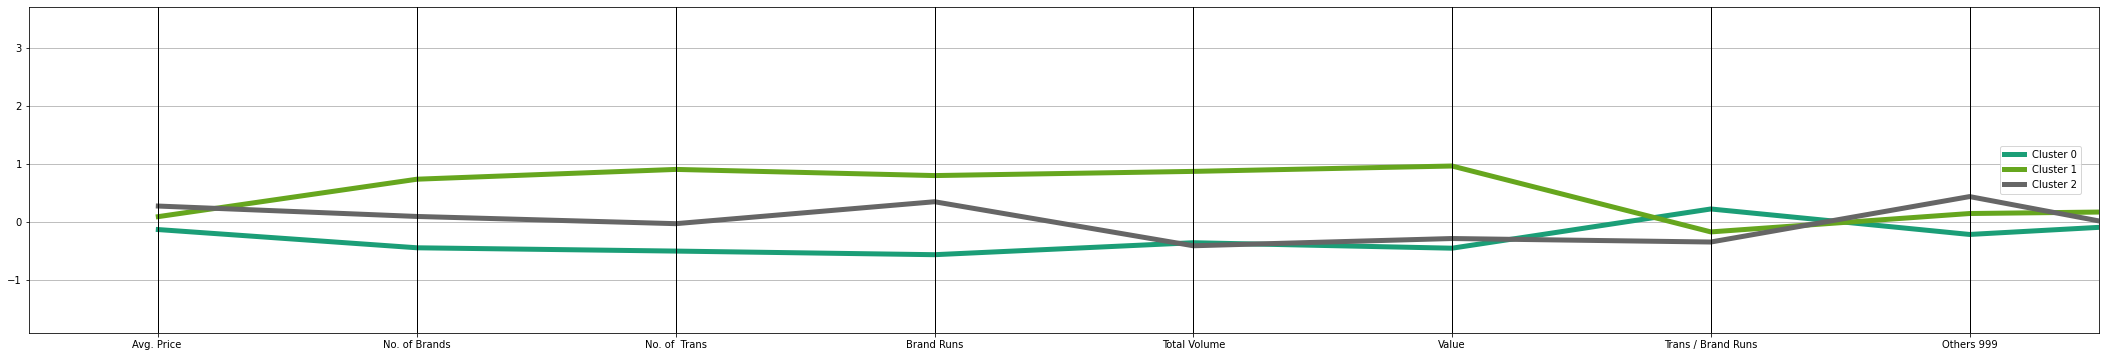

In [20]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [21]:
bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']].groupby(kmeans.labels_).mean()

,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %
0,-0.138,-0.452,-0.509,-0.571,-0.364,-0.459,0.218,-0.222,0.024,3.455,0.432,-0.403,-0.196
1,0.086,0.732,0.901,0.795,0.867,0.960,-0.178,0.140,0.190,3.455,0.194,-0.193,-0.072
2,0.268,0.089,-0.036,0.343,-0.417,-0.292,-0.352,0.432,-0.409,3.455,-1.664,1.574,0.728


In [22]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

       0      1      2
0  0.000  3.044  3.412
1  3.044  0.000  3.526
2  3.412  3.526  0.000


In [23]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    6.456
1    6.570
2    6.938
dtype: float64

C:\Users\rs7am\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


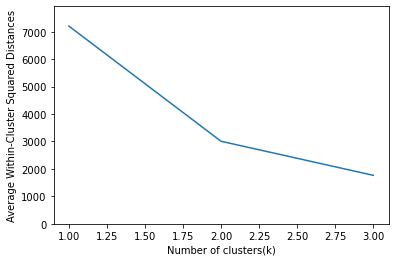

In [24]:
inertia = []
for n_clusters in range(1, 4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %']])
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 4), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### b. The variables that describe the basis for purchase. (K = 2)

In [25]:
#bathsoap_df_norm.info()

In [26]:
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']])
# Cluster membership
memb1 = pd.Series(kmeans1.labels_, index=bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']].index)
for key, item in memb1.groupby(memb1):
    print(key, ': ', ', '.join([str(i) for i in item.index]))

0 :  1014020.0, 1014030.0, 1017160.0, 1025140.0, 1025210.0, 1027040.0, 1027160.0, 1027210.0, 1027680.0, 1027720.0, 1027810.0, 1027840.0, 1028020.0, 1030040.0, 1030150.0, 1030280.0, 1030300.0, 1034020.0, 1035100.0, 1037050.0, 1037190.0, 1037250.0, 1037420.0, 1037690.0, 1037890.0, 1037940.0, 1038110.0, 1040080.0, 1044010.0, 1045100.0, 1047350.0, 1047420.0, 1050050.0, 1054270.0, 1055260.0, 1057150.0, 1058350.0, 1060330.0, 1060810.0, 1061500.0, 1061940.0, 1062220.0, 1062310.0, 1065040.0, 1065450.0, 1065510.0, 1065710.0, 1070040.0, 1070070.0, 1070140.0, 1070980.0, 1071340.0, 1071460.0, 1077500.0, 1080690.0, 1081110.0, 1081820.0, 1081900.0, 1082110.0, 1082190.0, 1082210.0, 1082260.0, 1085080.0, 1085480.0, 1085530.0, 1085590.0, 1097370.0, 1105130.0, 1106020.0, 1111710.0, 1115100.0, 1125840.0, 1150970.0, 1156220.0, 1157860.0, 1158080.0, 1163830.0
1 :  1010010.0, 1010020.0, 1014190.0, 1017020.0, 1017110.0, 1017360.0, 1017460.0, 1017490.0, 1020070.0, 1020210.0, 1024050.0, 1024100.0, 1024120.0, 1

Cluster centroids and squared distances for k-means
with k = 2

In [27]:
centroids1 = pd.DataFrame(kmeans1.cluster_centers_, columns=bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']].columns)
pd.set_option('precision', 3)
print(centroids1)

   Pr Cat 1  Pr Cat 2  Pr Cat 3  Pr Cat 4  PropCat 5  PropCat 14  \
0    -0.792    -1.135     2.389    -0.335     -1.107       2.394   
1     0.117     0.167    -0.352     0.049      0.163      -0.352   

   Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  
0                 0.206             -0.403                  0.179  
1                -0.030              0.059                 -0.026  


Within-cluster sum of squared distances and cluster count

In [28]:
withinClusterSS = [0] * 2
clusterCount = [0] * 2
for cluster, distance in zip(kmeans1.labels_, kmeans1.transform(bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']])):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (77 members): 286.65 within cluster
Cluster 1 (523 members): 3794.51 within cluster


,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,cluster
0,-0.792,-1.135,2.389,-0.335,-1.107,2.394,0.206,-0.403,0.179,Cluster 0
1,0.117,0.167,-0.352,0.049,0.163,-0.352,-0.030,0.059,-0.026,Cluster 1


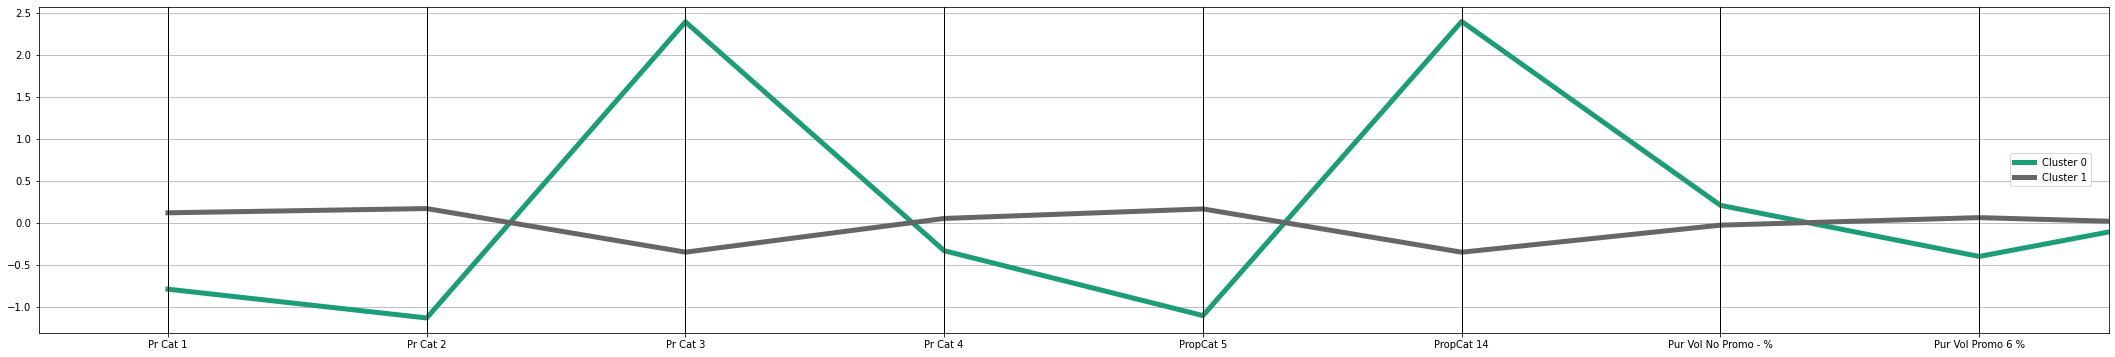

In [29]:
centroids1['cluster'] = ['Cluster {}'.format(i) for i in centroids1.index]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids1, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids1

In [30]:
bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']].groupby(kmeans.labels_).mean()

,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %
0,-0.116,-0.055,0.216,-0.042,0.017,0.218,0.432,-0.403,-0.196
1,0.061,0.140,-0.175,-0.072,0.001,-0.181,0.194,-0.193,-0.072
2,0.248,-0.079,-0.350,0.255,-0.055,-0.348,-1.664,1.574,0.728


In [31]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans1.cluster_centers_, metric='euclidean')))

       0      1
0  0.000  4.433
1  4.433  0.000


In [32]:
pd.DataFrame(pairwise.pairwise_distances(kmeans1.cluster_centers_, metric='euclidean')).sum(axis=0)

0    4.433
1    4.433
dtype: float64

C:\Users\rs7am\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


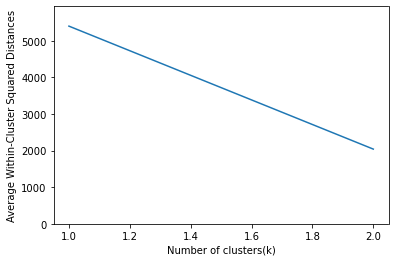

In [33]:
inertia = []
for n_clusters in range(1, 3):
    kmeans1 = KMeans(n_clusters=n_clusters, random_state=0).fit(bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']])
    inertia.append(kmeans1.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 3), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### b. The variables that describe the basis for purchase. (K = 3)

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']])
# Cluster membership
memb = pd.Series(kmeans.labels_, index=bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']].index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join([str(i) for i in item.index]))

0 :  1014190.0, 1017490.0, 1025070.0, 1028050.0, 1037220.0, 1044140.0, 1047610.0, 1047650.0, 1047760.0, 1057550.0, 1058190.0, 1060130.0, 1060150.0, 1060590.0, 1061580.0, 1061820.0, 1065080.0, 1065160.0, 1065660.0, 1071800.0, 1075060.0, 1075220.0, 1075280.0, 1075690.0, 1080330.0, 1080590.0, 1081720.0, 1085340.0, 1095130.0, 1095150.0, 1097370.0, 1101070.0, 1104380.0, 1104630.0, 1105400.0, 1105830.0, 1106440.0, 1106730.0, 1106810.0, 1110370.0, 1111180.0, 1111280.0, 1116000.0, 1116050.0, 1116730.0, 1120150.0, 1121050.0, 1121270.0, 1121350.0, 1121780.0, 1125100.0, 1125140.0, 1125910.0, 1137070.0, 1140670.0, 1145120.0, 1146060.0, 1146840.0, 1147700.0, 1148070.0, 1150400.0, 1150620.0, 1150720.0, 1150750.0, 1151290.0, 1151420.0, 1151830.0, 1152050.0, 1155080.0, 1155150.0, 1155360.0, 1155460.0, 1155580.0, 1155820.0, 1156240.0, 1156970.0, 1157180.0, 1157190.0, 1157310.0, 1157320.0, 1157490.0, 1157830.0, 1157860.0, 1160140.0, 1160540.0, 1162150.0, 1162360.0, 1162660.0, 1162680.0, 1162960.0, 11651

Cluster centroids and squared distances for k-means
with k = 3

In [35]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']].columns)
pd.set_option('precision', 3)
print(centroids)

   Pr Cat 1  Pr Cat 2  Pr Cat 3  Pr Cat 4  PropCat 5  PropCat 14  \
0     0.334    -0.266    -0.370     0.459      0.002      -0.373   
1     0.063     0.259    -0.336    -0.043      0.196      -0.336   
2    -0.804    -1.153     2.435    -0.352     -1.138       2.439   

   Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  
0                -1.744              1.606                  0.819  
1                 0.350             -0.288                 -0.209  
2                 0.257             -0.435                  0.136  


Within-cluster sum of squared distances and cluster count

In [36]:
withinClusterSS = [0] * 3
clusterCount = [0] * 3
for cluster, distance in zip(kmeans.labels_, kmeans.transform(bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']])):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (97 members): 1125.72 within cluster
Cluster 1 (429 members): 1959.39 within cluster
Cluster 2 (74 members): 237.85 within cluster


,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,cluster
0,0.334,-0.266,-0.370,0.459,0.002,-0.373,-1.744,1.606,0.819,Cluster 0
1,0.063,0.259,-0.336,-0.043,0.196,-0.336,0.350,-0.288,-0.209,Cluster 1
2,-0.804,-1.153,2.435,-0.352,-1.138,2.439,0.257,-0.435,0.136,Cluster 2


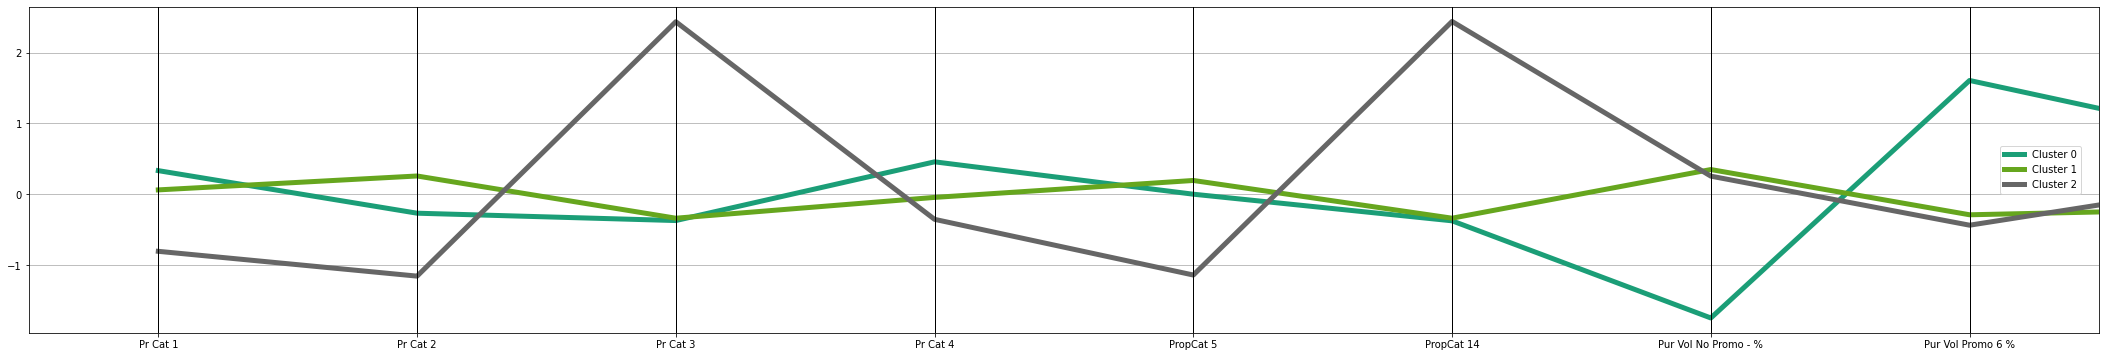

In [37]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [38]:
bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']].groupby(kmeans.labels_).mean()

,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %
0,0.334,-0.266,-0.370,0.459,0.002,-0.373,-1.744,1.606,0.819
1,0.063,0.259,-0.336,-0.043,0.196,-0.336,0.350,-0.288,-0.209
2,-0.804,-1.153,2.435,-0.352,-1.138,2.439,0.257,-0.435,0.136


In [39]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

       0      1      2
0  0.000  3.110  5.334
1  3.110  0.000  4.489
2  5.334  4.489  0.000


In [40]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    8.443
1    7.598
2    9.822
dtype: float64

C:\Users\rs7am\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


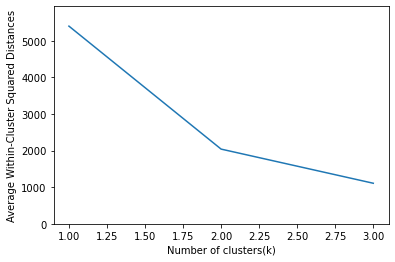

In [41]:
inertia = []
for n_clusters in range(1, 4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bathsoap_df_norm[[ 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']])
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 4), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### c. The variables that describe both purchase behavior and basis of purchase. (K = 2)

In [42]:
bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']]

,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14
Member id,,,,,,,,,,,,,,,,,,,
1.010e+06,-0.440,-0.404,-0.411,0.120,-0.501,-0.589,-0.464,-0.100,-0.325,3.455,0.729,-0.576,-0.466,-0.162,0.217,-0.031,-0.072,0.140,-2.122e-02
1.010e+06,0.052,0.864,0.508,0.891,0.266,0.390,-0.391,0.597,-0.264,3.455,-0.215,0.464,-0.242,0.051,0.174,-0.166,-0.126,-0.003,-2.106e-01
1.014e+06,-0.908,0.864,1.829,2.047,1.442,0.694,-0.353,-0.482,-0.195,3.455,0.239,-0.366,0.076,-0.566,-0.562,1.578,-0.463,-0.673,1.600e+00
1.014e+06,-1.132,-1.038,-1.559,-1.132,-1.343,-1.386,-0.622,-1.757,-0.161,3.455,0.729,-0.576,-0.466,-0.994,-0.299,1.721,-0.463,-0.181,1.744e+00
1.014e+06,-1.261,-0.404,-1.043,-0.940,-0.466,-0.846,-0.172,0.960,0.899,3.455,-2.501,0.980,2.885,-0.994,-1.429,0.020,3.752,1.108,3.046e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.167e+06,0.445,-0.404,-0.526,-1.036,-0.373,-0.135,0.685,-1.561,-0.019,3.455,-1.151,1.839,-0.466,-0.787,1.441,-0.520,-0.463,-1.201,-5.134e-01
1.167e+06,1.341,0.864,-0.181,0.698,-0.885,-0.551,-0.537,0.526,-0.944,3.455,0.107,0.223,-0.466,0.911,-0.407,-0.520,0.054,-0.914,-5.134e-01
1.167e+06,-0.130,0.230,-0.353,0.313,2.215,2.227,-0.499,0.120,3.013,3.455,0.729,-0.576,-0.466,-0.388,0.502,0.154,-0.463,0.524,1.653e-01


In [43]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']])
# Cluster membership
memb = pd.Series(kmeans.labels_, index=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']].index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join([str(i) for i in item.index]))

0 :  1010010.0, 1010020.0, 1014020.0, 1014190.0, 1017020.0, 1017110.0, 1017360.0, 1017460.0, 1017490.0, 1020070.0, 1020210.0, 1024050.0, 1024100.0, 1024120.0, 1024220.0, 1024400.0, 1024630.0, 1025070.0, 1027390.0, 1027480.0, 1027540.0, 1027580.0, 1027750.0, 1028050.0, 1028110.0, 1028230.0, 1030200.0, 1034130.0, 1034220.0, 1034350.0, 1035020.0, 1035150.0, 1037120.0, 1037220.0, 1037290.0, 1037630.0, 1037720.0, 1037850.0, 1038000.0, 1038080.0, 1040080.0, 1040150.0, 1040190.0, 1040250.0, 1040340.0, 1040370.0, 1044140.0, 1044370.0, 1045030.0, 1045060.0, 1045120.0, 1047210.0, 1047220.0, 1047610.0, 1047650.0, 1047750.0, 1047760.0, 1047870.0, 1047980.0, 1050210.0, 1054110.0, 1054310.0, 1055060.0, 1055160.0, 1055330.0, 1057280.0, 1057410.0, 1057500.0, 1057510.0, 1057550.0, 1057580.0, 1057800.0, 1057930.0, 1058000.0, 1058010.0, 1058190.0, 1058370.0, 1060050.0, 1060130.0, 1060150.0, 1060230.0, 1060260.0, 1060370.0, 1060420.0, 1060590.0, 1060640.0, 1060650.0, 1060720.0, 1060760.0, 1060920.0, 10609

Cluster centroids and squared distances for k-means
with k = 2

In [44]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']].columns)
pd.set_option('precision', 3)
print(centroids)

   Avg. Price   No. of Brands  No. of  Trans  Brand Runs  Total Volume  Value  \
0        0.179          0.069          0.053       0.104        -0.019  0.070   
1       -1.311         -0.509         -0.391      -0.763         0.137 -0.514   

   Trans / Brand Runs  Others 999  Vol/Tran  max_BrIndicator  \
0              -0.137       0.170    -0.071            3.455   
1               1.006      -1.249     0.521            3.455   

   Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  Pr Cat 1  \
0                -0.027              0.056                 -0.028     0.109   
1                 0.197             -0.414                  0.208    -0.798   

   Pr Cat 2  Pr Cat 3  Pr Cat 4  PropCat 5  PropCat 14  
0     0.164    -0.337     0.045      0.154      -0.338  
1    -1.206     2.472    -0.328     -1.128       2.476  


Within-cluster sum of squared distances and cluster count

In [45]:
withinClusterSS = [0] * 2
clusterCount = [0] * 2
for cluster, distance in zip(kmeans.labels_, kmeans.transform(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']])):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (528 members): 8146.44 within cluster
Cluster 1 (72 members): 872.36 within cluster


,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,cluster
0,0.179,0.069,0.053,0.104,-0.019,0.070,-0.137,0.170,-0.071,3.455,-0.027,0.056,-0.028,0.109,0.164,-0.337,0.045,0.154,-0.338,Cluster 0
1,-1.311,-0.509,-0.391,-0.763,0.137,-0.514,1.006,-1.249,0.521,3.455,0.197,-0.414,0.208,-0.798,-1.206,2.472,-0.328,-1.128,2.476,Cluster 1


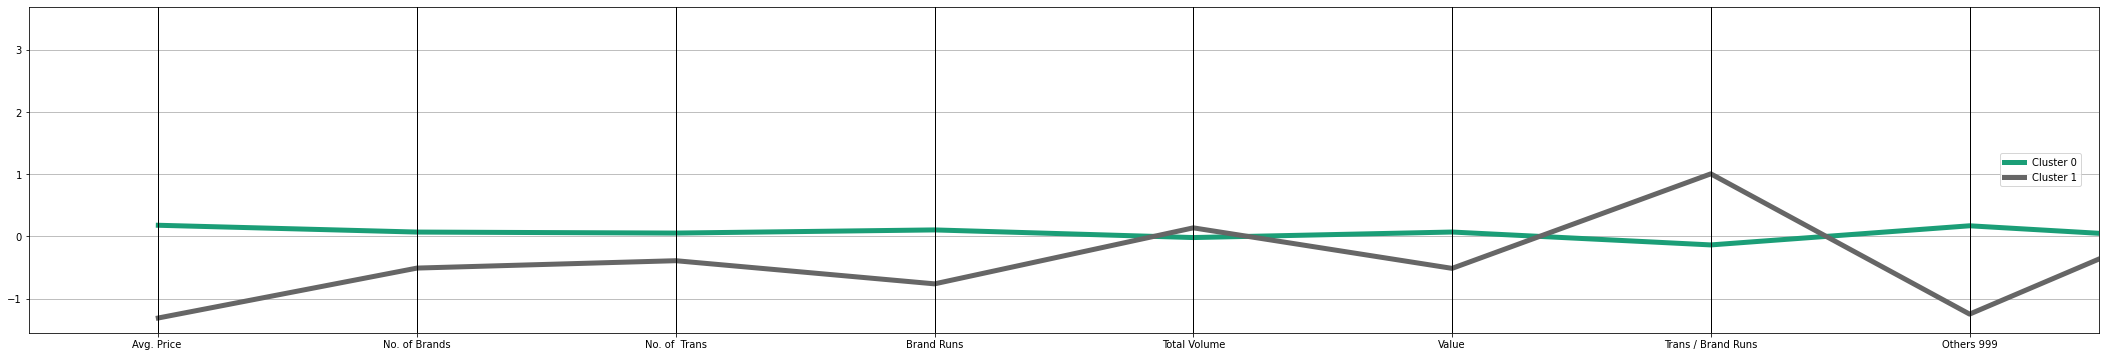

In [46]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [47]:
bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']].groupby(kmeans.labels_).mean()

,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14
0,0.179,0.069,0.053,0.104,-0.019,0.070,-0.137,0.170,-0.071,3.455,-0.027,0.056,-0.028,0.109,0.164,-0.337,0.045,0.154,-0.338
1,-1.311,-0.509,-0.391,-0.763,0.137,-0.514,1.006,-1.249,0.521,3.455,0.197,-0.414,0.208,-0.798,-1.206,2.472,-0.328,-1.128,2.476


In [48]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

       0      1
0  0.000  5.307
1  5.307  0.000


In [49]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    5.307
1    5.307
dtype: float64

C:\Users\rs7am\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


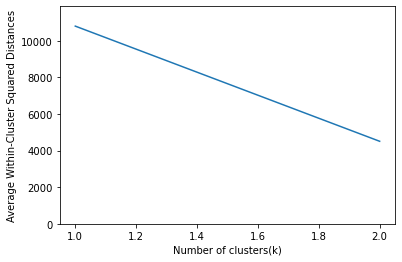

In [50]:
inertia = []
for n_clusters in range(1, 3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']])
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 3), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### c. The variables that describe both purchase behavior and basis of purchase. (K = 3)

In [51]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']])
# Cluster membership
memb = pd.Series(kmeans.labels_, index=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']].index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join([str(i) for i in item.index]))

0 :  1010010.0, 1010020.0, 1014020.0, 1014190.0, 1017020.0, 1017110.0, 1017360.0, 1017490.0, 1020070.0, 1020210.0, 1024050.0, 1024100.0, 1024120.0, 1024220.0, 1024400.0, 1024630.0, 1027390.0, 1027480.0, 1027540.0, 1027580.0, 1027750.0, 1028110.0, 1028230.0, 1030200.0, 1034130.0, 1034220.0, 1034350.0, 1035020.0, 1037120.0, 1037220.0, 1037290.0, 1037630.0, 1037720.0, 1037850.0, 1038000.0, 1038080.0, 1040080.0, 1040150.0, 1040190.0, 1040250.0, 1040340.0, 1040370.0, 1044370.0, 1045060.0, 1045120.0, 1047210.0, 1047220.0, 1047350.0, 1047750.0, 1047760.0, 1047870.0, 1054110.0, 1055060.0, 1055160.0, 1055330.0, 1057280.0, 1057410.0, 1057500.0, 1057510.0, 1057550.0, 1057580.0, 1057800.0, 1058000.0, 1058010.0, 1058190.0, 1058370.0, 1060050.0, 1060150.0, 1060260.0, 1060370.0, 1060420.0, 1060590.0, 1060640.0, 1060650.0, 1060720.0, 1060760.0, 1060920.0, 1060980.0, 1061080.0, 1061180.0, 1061310.0, 1061400.0, 1061660.0, 1061700.0, 1061730.0, 1061820.0, 1061830.0, 1062120.0, 1065100.0, 1065160.0, 10653

Cluster centroids and squared distances for k-means
with k = 3

In [52]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']].columns)
pd.set_option('precision', 3)
print(centroids)

   Avg. Price   No. of Brands  No. of  Trans  Brand Runs  Total Volume  Value  \
0       -0.281          0.126          0.119       0.055         0.262  0.178   
1       -1.335         -0.597         -0.423      -0.804         0.102 -0.547   
2        0.943         -0.005         -0.054       0.189        -0.480 -0.110   

   Trans / Brand Runs  Others 999  Vol/Tran  max_BrIndicator  \
0              -0.072      -0.012     0.184            3.455   
1               1.061      -1.272     0.532            3.455   
2              -0.249       0.466    -0.498            3.455   

   Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  Pr Cat 1  \
0                 0.285             -0.215                 -0.196    -0.476   
1                 0.244             -0.434                  0.157    -0.811   
2                -0.569              0.517                  0.278     1.091   

   Pr Cat 2  Pr Cat 3  Pr Cat 4  PropCat 5  PropCat 14  
0     0.522    -0.250     0.199      0.404  

Within-cluster sum of squared distances and cluster count

In [53]:
withinClusterSS = [0] * 3
clusterCount = [0] * 3
for cluster, distance in zip(kmeans.labels_, kmeans.transform(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']])):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (334 members): 4106.08 within cluster
Cluster 1 (69 members): 783.94 within cluster
Cluster 2 (197 members): 3073.31 within cluster


,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,cluster
0,-0.281,0.126,0.119,0.055,0.262,0.178,-0.072,-0.012,0.184,3.455,0.285,-0.215,-0.196,-0.476,0.522,-0.250,0.199,0.404,-0.252,Cluster 0
1,-1.335,-0.597,-0.423,-0.804,0.102,-0.547,1.061,-1.272,0.532,3.455,0.244,-0.434,0.157,-0.811,-1.225,2.514,-0.335,-1.161,2.517,Cluster 1
2,0.943,-0.005,-0.054,0.189,-0.480,-0.110,-0.249,0.466,-0.498,3.455,-0.569,0.517,0.278,1.091,-0.455,-0.456,-0.220,-0.278,-0.454,Cluster 2


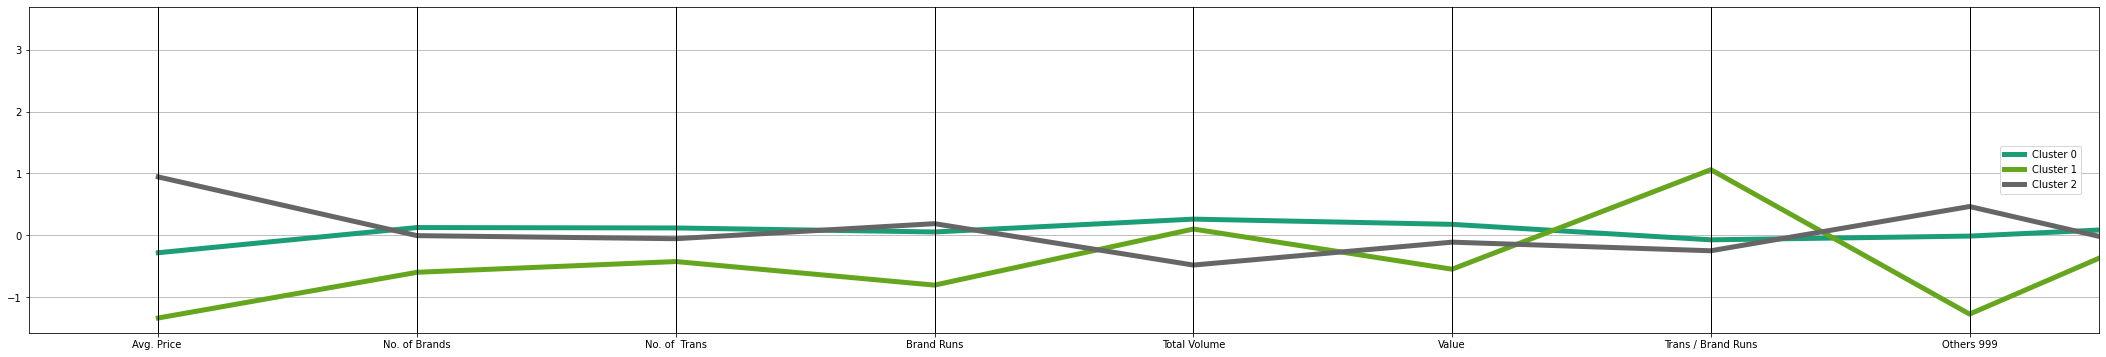

In [54]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [55]:
bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']].groupby(kmeans.labels_).mean()

,Avg. Price,No. of Brands,No. of Trans,Brand Runs,Total Volume,Value,Trans / Brand Runs,Others 999,Vol/Tran,max_BrIndicator,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14
0,-0.281,0.126,0.119,0.055,0.262,0.178,-0.072,-0.012,0.184,3.455,0.285,-0.215,-0.196,-0.476,0.522,-0.250,0.199,0.404,-0.252
1,-1.335,-0.597,-0.423,-0.804,0.102,-0.547,1.061,-1.272,0.532,3.455,0.244,-0.434,0.157,-0.811,-1.225,2.514,-0.335,-1.161,2.517
2,0.943,-0.005,-0.054,0.189,-0.480,-0.110,-0.249,0.466,-0.498,3.455,-0.569,0.517,0.278,1.091,-0.455,-0.456,-0.220,-0.278,-0.454


In [56]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

       0      1      2
0  0.000  5.252  2.923
1  5.252  0.000  6.101
2  2.923  6.101  0.000


In [57]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0     8.175
1    11.353
2     9.024
dtype: float64

C:\Users\rs7am\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


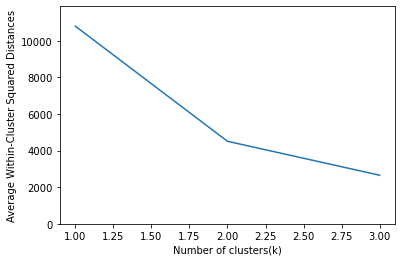

In [58]:
inertia = []
for n_clusters in range(1, 4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bathsoap_df_norm[[ 'Avg. Price ', 'No. of Brands','No. of  Trans', 'Brand Runs','Total Volume', 'Value','Trans / Brand Runs', 'Others 999', 'Vol/Tran','max_BrIndicator', 'Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5',  'PropCat 14']])
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 4), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### Q2. Select what you think is the best clustering and comment on the characteristics (demographic, brand loyalty, and basis for purchase) of these clusters. (This information would be used to guide the development of advertising and promotional campaigns.)

#### We chose the clusters in part b with k = 2 based on the centroid chart and the elbow chart. Where there is seperation between the two clusters. From the chart we can see this can guide the advertising and promotional compaigns to focus on the price cat 3 and prop cat 14 for cluster 0. However, cluster 0 is not responsive to promotions.



,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,cluster
0,-0.792,-1.135,2.389,-0.335,-1.107,2.394,0.206,-0.403,0.179,Cluster 0
1,0.117,0.167,-0.352,0.049,0.163,-0.352,-0.030,0.059,-0.026,Cluster 1


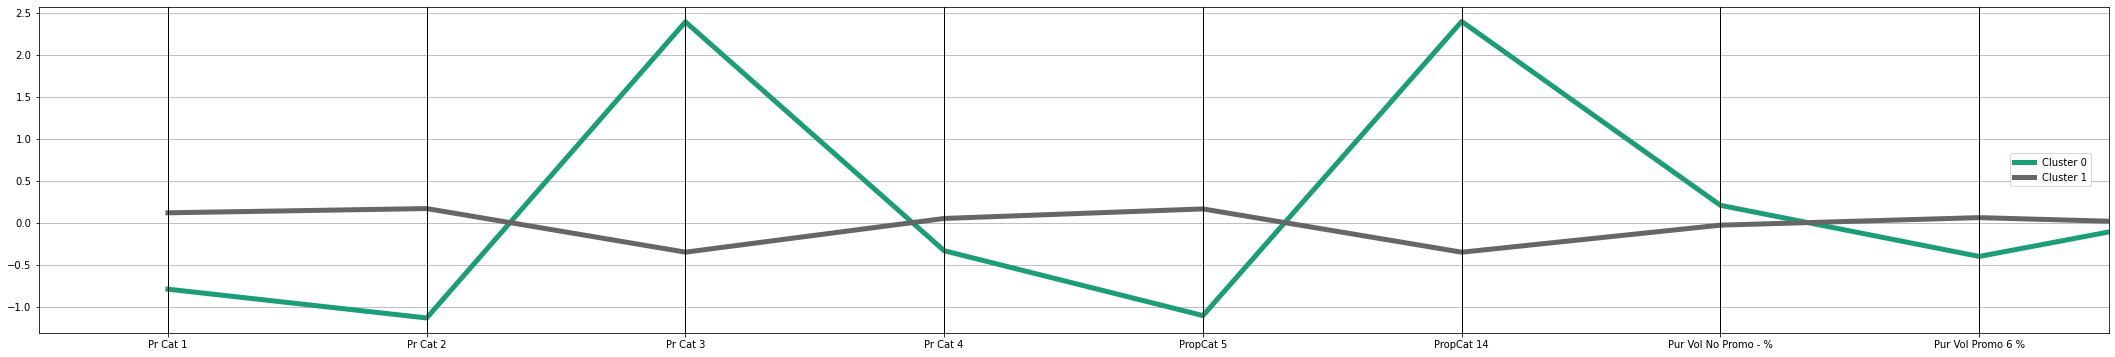

In [59]:
centroids1['cluster'] = ['Cluster {}'.format(i) for i in centroids1.index]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids1, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids1

### Q3. Develop a model that classifies the data into these segments. Since this information would most likely be used in targeting direct-mail promotions, it would be useful to select a market segment that would be defined as a success in the classification model. (use logistic regression)

In [60]:
our_clusters = kmeans1.labels_

In [61]:
bathsoap_df_norm['Clusters'] = our_clusters.tolist() # Here we add the clustering results to our data.

In [62]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT # pip install mord, install in terminal
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [63]:
y = bathsoap_df_norm['Clusters']
X = bathsoap_df_norm.drop(columns=['Clusters'])
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=1)
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.3155119133122284
         SEC   FEH    MT    SEX    AGE   EDU    HS  CHILD     CS  \
coeff -0.865 -0.78  0.44 -1.296  0.783 -1.91  0.01  -0.72  0.365   

       Affluence Index  ...  PropCat 8  PropCat 9  PropCat 10  PropCat 11  \
coeff            -0.21  ...     -0.258     -0.828      -0.045      -0.113   

       PropCat 12  PropCat 13  PropCat 14  PropCat 15  Class  max_BrIndicator  
coeff       0.323      -0.003      -3.664         0.1 -0.223            4.545  

[1 rows x 47 columns]
AIC -37.196875660674436


In [64]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })

print(logit_result)

           actual       p(0)  p(1)  predicted
Member id                                    
1.148e+06       1  4.104e-09   1.0          1
1.145e+06       1  7.844e-11   1.0          1
1.157e+06       1  1.379e-09   1.0          1
1.150e+06       1  2.975e-11   1.0          1
1.077e+06       1  1.198e-09   1.0          1
...           ...        ...   ...        ...
1.058e+06       1  1.312e-07   1.0          1
1.162e+06       1  4.146e-11   1.0          1
1.121e+06       1  7.468e-07   1.0          1
1.122e+06       1  2.196e-10   1.0          1
1.081e+06       1  5.062e-09   1.0          1

[240 rows x 4 columns]


In [65]:
# training confusion matrix
classificationSummary(train_y, logit_reg.predict(train_X))
# validation confusion matrix
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0  41   0
     1   0 319
Confusion Matrix (Accuracy 0.9667)

       Prediction
Actual   0   1
     0  30   6
     1   2 202
